In [87]:
import pandas as pd
import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [88]:
def EmbeddingRec(char_embedding_size, chars_lenght, num_chars, word_embedding_size):
    poll_2_size = int(word_embedding_size / 2)
    poll_3_size = word_embedding_size - poll_2_size
    
    user_input = keras.Input(shape=(1, chars_lenght), name='user_id')
    # embedding
    emb_applied = layers.Embedding(input_dim=num_chars, output_dim=char_embedding_size, name='user_emb')(user_input)

    flatten = keras.layers.Flatten()(emb_applied)
    reshaped = layers.Reshape((chars_lenght, char_embedding_size, 1))(flatten)

    conv_1 = layers.Conv2D(poll_3_size, kernel_size=(3, char_embedding_size), name="conv_1")(reshaped)
    conv_1_flatten = layers.Flatten()(conv_1)
    
    conv_2 = layers.Conv2D(poll_2_size, kernel_size=(2, char_embedding_size), name="conv_2")(reshaped)
    conv_2_flatten = layers.Flatten()(conv_2)
    
    concat = layers.Concatenate()([conv_1_flatten, conv_2_flatten])
    word_embedding = layers.Dense(word_embedding_size, name="result_embedding")(concat)
    # ========
    
    dense_1 = layers.Dense(8, activation='relu', name='FullyConnected-1')(word_embedding)
    
    dense_2 = layers.Dense(8, activation='relu', name='FullyConnected-2')(dense_1)

    result = layers.Dense(word_embedding_size, name='result')(dense_2)

    adam = keras.optimizers.Adam(lr=0.001)
    model = keras.Model(user_input, result)
    model.compile(optimizer=adam, loss="mse", metrics="mse")
    
    word_model = keras.Model(user_input, word_embedding)
    
    return model, word_model

In [89]:
model, word_model = EmbeddingRec(
    char_embedding_size=10,
    chars_lenght=3,
    num_chars=10,
    word_embedding_size=2
)

In [90]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 user_emb (Embedding)           (None, 1, 3, 10)     100         ['user_id[0][0]']                
                                                                                                  
 flatten_12 (Flatten)           (None, 30)           0           ['user_emb[0][0]']               
                                                                                                  
 reshape_4 (Reshape)            (None, 3, 10, 1)     0           ['flatten_12[0][0]']             
                                                                                            

In [91]:
np.array([[[2, 2, 1]], [[1, 2, 1]]]).shape

(2, 1, 3)

In [92]:
model.predict(np.array([[[2, 2, 1]], [[1, 2, 1]]])).shape

1/1 [==============================] - 0s 49ms/step


(2, 2)

In [93]:
model.predict(np.array([[[2, 2, 1]], [[1, 2, 1]]]))

1/1 [==============================] - 0s 11ms/step


array([[0.00178339, 0.00189863],
       [0.00234312, 0.00240565]], dtype=float32)

In [94]:
word_model.predict(np.array([[[2, 2, 1]], [[1, 2, 1]]])).shape

1/1 [==============================] - 0s 38ms/step


(2, 2)

In [95]:
word_model.predict(np.array([[[2, 2, 1]], [[1, 2, 1]]]))

1/1 [==============================] - 0s 8ms/step


array([[0.00722951, 0.00545177],
       [0.00930743, 0.00790287]], dtype=float32)

In [96]:
word_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 user_emb (Embedding)           (None, 1, 3, 10)     100         ['user_id[0][0]']                
                                                                                                  
 flatten_12 (Flatten)           (None, 30)           0           ['user_emb[0][0]']               
                                                                                                  
 reshape_4 (Reshape)            (None, 3, 10, 1)     0           ['flatten_12[0][0]']             
                                                                                            

In [97]:
def int_to_vec(v):
    p = str(v)
#     if len(p) == 3:
#         z = [int(p[0]), int(p[1]), int(p[2])]
    if len(p) == 2:
        z = [0, int(p[0]), int(p[1])]
    if len(p) == 1:
        z = [0, 0, int(p[0])]
    return z

In [98]:
X = []
y = []

for i in range(100):
    z = int_to_vec(i%100)
    X.append(z)
    z = int_to_vec((i+1)%100)
    y.append(z)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [100]:
X_train = np.array(X_train).reshape(len(X_train), 1, 3)
X_test = np.array(X_test).reshape(len(X_test), 1, 3)
y_train = np.array(y_train).reshape(len(y_train), 1, 3)
y_test = np.array(y_test).reshape(len(y_test), 1, 3)

1/1 [==============================] - 0s 13ms/step


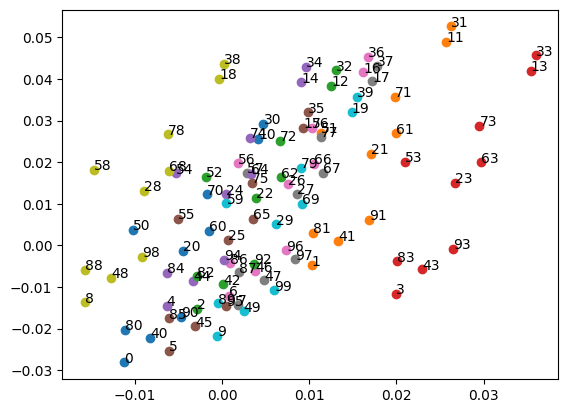

3/3 [==============================] - 0s 42ms/step - loss: 3.2297e-04 - mse: 3.2297e-04 - val_loss: 2.5616e-04 - val_mse: 2.5616e-04
epoch  0
3/3 [==============================] - 0s 14ms/step - loss: 2.3860e-04 - mse: 2.3860e-04 - val_loss: 2.0368e-04 - val_mse: 2.0368e-04
epoch  1
3/3 [==============================] - 0s 13ms/step - loss: 2.4672e-04 - mse: 2.4672e-04 - val_loss: 1.9403e-04 - val_mse: 1.9403e-04
epoch  2
3/3 [==============================] - 0s 14ms/step - loss: 2.7754e-04 - mse: 2.7754e-04 - val_loss: 2.0120e-04 - val_mse: 2.0120e-04
epoch  3
3/3 [==============================] - 0s 13ms/step - loss: 3.2020e-04 - mse: 3.2020e-04 - val_loss: 2.1774e-04 - val_mse: 2.1774e-04
epoch  4
3/3 [==============================] - 0s 13ms/step - loss: 3.7740e-04 - mse: 3.7740e-04 - val_loss: 2.4539e-04 - val_mse: 2.4539e-04
epoch  5
3/3 [==============================] - 0s 14ms/step - loss: 4.4062e-04 - mse: 4.4062e-04 - val_loss: 2.7318e-04 - val_mse: 2.7318e-04
epoch  6

3/3 [==============================] - 0s 13ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0028 - val_mse: 0.0028
epoch  34
3/3 [==============================] - 0s 13ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0028 - val_mse: 0.0028
epoch  35
3/3 [==============================] - 0s 118ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0029 - val_mse: 0.0029
epoch  36
3/3 [==============================] - 0s 13ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0029 - val_mse: 0.0029
epoch  37
3/3 [==============================] - 0s 13ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0029 - val_mse: 0.0029
epoch  38
3/3 [==============================] - 0s 13ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0029 - val_mse: 0.0029
epoch  39
3/3 [==============================] - 0s 13ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0030 - val_mse: 0.0030
epoch  40
3/3 [==============================] - 0s 13ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0030 - v

1/1 [==============================] - 0s 14ms/step


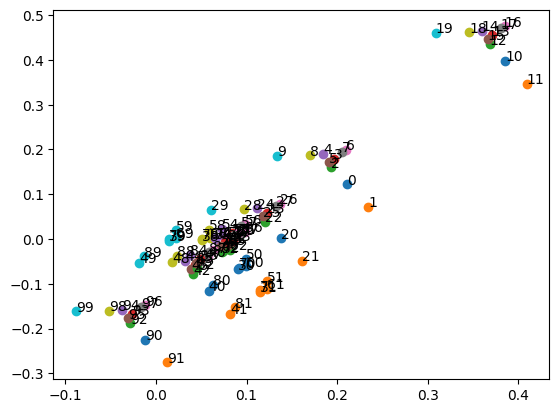

3/3 [==============================] - 0s 13ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0036 - val_mse: 0.0036
epoch  50
3/3 [==============================] - 0s 14ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0037 - val_mse: 0.0037
epoch  51
3/3 [==============================] - 0s 13ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0037 - val_mse: 0.0037
epoch  52
3/3 [==============================] - 0s 13ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0038 - val_mse: 0.0038
epoch  53
3/3 [==============================] - 0s 13ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0038 - val_mse: 0.0038
epoch  54
3/3 [==============================] - 0s 13ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0039 - val_mse: 0.0039
epoch  55
3/3 [==============================] - 0s 13ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0040 - val_mse: 0.0040
epoch  56
3/3 [==============================] - 0s 13ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0042 - va

3/3 [==============================] - 0s 131ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0081 - val_mse: 0.0081
epoch  85
3/3 [==============================] - 0s 13ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0082 - val_mse: 0.0082
epoch  86
3/3 [==============================] - 0s 13ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0083 - val_mse: 0.0083
epoch  87
3/3 [==============================] - 0s 13ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0084 - val_mse: 0.0084
epoch  88
3/3 [==============================] - 0s 13ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0084 - val_mse: 0.0084
epoch  89
3/3 [==============================] - 0s 13ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0085 - val_mse: 0.0085
epoch  90
3/3 [==============================] - 0s 14ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0086 - val_mse: 0.0086
epoch  91
3/3 [==============================] - 0s 13ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0088 - v

1/1 [==============================] - 0s 13ms/step


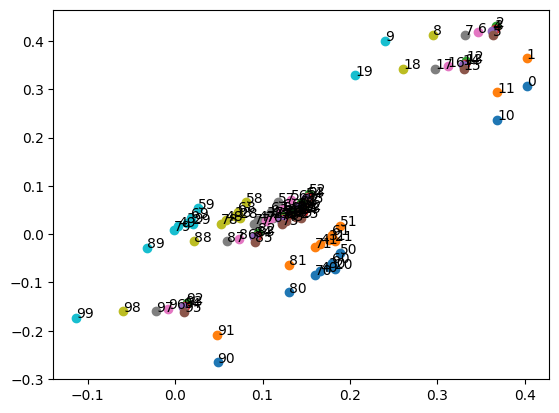

3/3 [==============================] - 0s 15ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0102 - val_mse: 0.0102
epoch  100
3/3 [==============================] - 0s 14ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0104 - val_mse: 0.0104
epoch  101
3/3 [==============================] - 0s 13ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0106 - val_mse: 0.0106
epoch  102
3/3 [==============================] - 0s 13ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0107 - val_mse: 0.0107
epoch  103
3/3 [==============================] - 0s 13ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0109 - val_mse: 0.0109
epoch  104
3/3 [==============================] - 0s 13ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0110 - val_mse: 0.0110
epoch  105
3/3 [==============================] - 0s 14ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0110 - val_mse: 0.0110
epoch  106
3/3 [==============================] - 0s 14ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.01

3/3 [==============================] - 0s 13ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0174 - val_mse: 0.0174
epoch  135
3/3 [==============================] - 0s 14ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0180 - val_mse: 0.0180
epoch  136
3/3 [==============================] - 0s 13ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0184 - val_mse: 0.0184
epoch  137
3/3 [==============================] - 0s 13ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0188 - val_mse: 0.0188
epoch  138
3/3 [==============================] - 0s 14ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0190 - val_mse: 0.0190
epoch  139
3/3 [==============================] - 0s 13ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0191 - val_mse: 0.0191
epoch  140
3/3 [==============================] - 0s 13ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0196 - val_mse: 0.0196
epoch  141
3/3 [==============================] - 0s 13ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.01

1/1 [==============================] - 0s 13ms/step


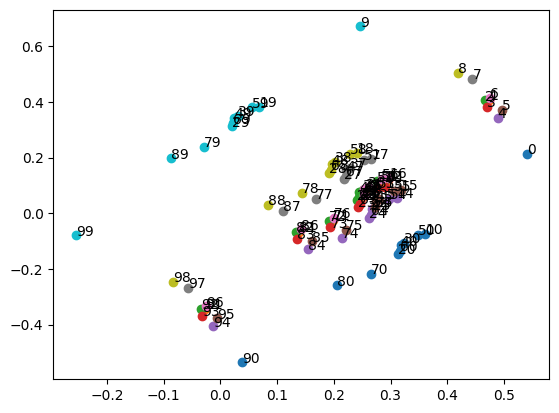

3/3 [==============================] - 0s 14ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0229 - val_mse: 0.0229
epoch  150
3/3 [==============================] - 0s 13ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0230 - val_mse: 0.0230
epoch  151
3/3 [==============================] - 0s 12ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0232 - val_mse: 0.0232
epoch  152
3/3 [==============================] - 0s 13ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0232 - val_mse: 0.0232
epoch  153
3/3 [==============================] - 0s 14ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0232 - val_mse: 0.0232
epoch  154
3/3 [==============================] - 0s 12ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0232 - val_mse: 0.0232
epoch  155
3/3 [==============================] - 0s 13ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0234 - val_mse: 0.0234
epoch  156
3/3 [==============================] - 0s 13ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.02

3/3 [==============================] - 0s 14ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0202 - val_mse: 0.0202
epoch  185
3/3 [==============================] - 0s 14ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0192 - val_mse: 0.0192
epoch  186
3/3 [==============================] - 0s 13ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0186 - val_mse: 0.0186
epoch  187
3/3 [==============================] - 0s 14ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0178 - val_mse: 0.0178
epoch  188
3/3 [==============================] - 0s 13ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0169 - val_mse: 0.0169
epoch  189
3/3 [==============================] - 0s 13ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0155 - val_mse: 0.0155
epoch  190
3/3 [==============================] - 0s 13ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0140 - val_mse: 0.0140
epoch  191
3/3 [==============================] - 0s 13ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.01

1/1 [==============================] - 0s 14ms/step


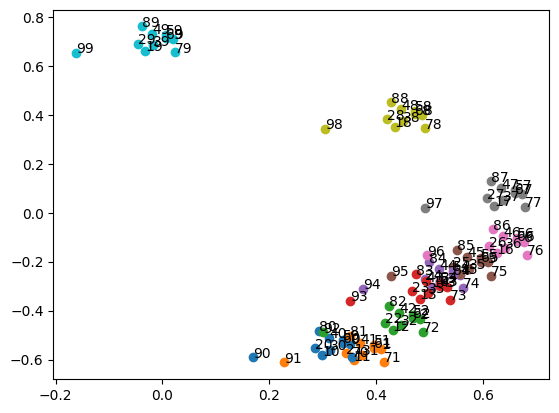

3/3 [==============================] - 0s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0078 - val_mse: 0.0078
epoch  200
3/3 [==============================] - 0s 13ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0061 - val_mse: 0.0061
epoch  201
3/3 [==============================] - 0s 13ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0050 - val_mse: 0.0050
epoch  202
3/3 [==============================] - 0s 14ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0050 - val_mse: 0.0050
epoch  203
3/3 [==============================] - 0s 13ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0048 - val_mse: 0.0048
epoch  204
3/3 [==============================] - 0s 13ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0044 - val_mse: 0.0044
epoch  205
3/3 [==============================] - 0s 14ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0038 - val_mse: 0.0038
epoch  206
3/3 [==============================] - 0s 13ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.00

3/3 [==============================] - 0s 14ms/step - loss: 7.9226e-04 - mse: 7.9226e-04 - val_loss: 8.8262e-04 - val_mse: 8.8262e-04
epoch  233
3/3 [==============================] - 0s 14ms/step - loss: 8.2926e-04 - mse: 8.2926e-04 - val_loss: 8.8842e-04 - val_mse: 8.8842e-04
epoch  234
3/3 [==============================] - 0s 13ms/step - loss: 8.3493e-04 - mse: 8.3493e-04 - val_loss: 8.6343e-04 - val_mse: 8.6343e-04
epoch  235
3/3 [==============================] - 0s 13ms/step - loss: 8.4010e-04 - mse: 8.4010e-04 - val_loss: 8.0518e-04 - val_mse: 8.0518e-04
epoch  236
3/3 [==============================] - 0s 12ms/step - loss: 8.3898e-04 - mse: 8.3898e-04 - val_loss: 7.4926e-04 - val_mse: 7.4926e-04
epoch  237
3/3 [==============================] - 0s 13ms/step - loss: 8.3647e-04 - mse: 8.3647e-04 - val_loss: 6.9065e-04 - val_mse: 6.9065e-04
epoch  238
3/3 [==============================] - 0s 14ms/step - loss: 8.6902e-04 - mse: 8.6902e-04 - val_loss: 6.5082e-04 - val_mse: 6.5082e

1/1 [==============================] - 0s 13ms/step


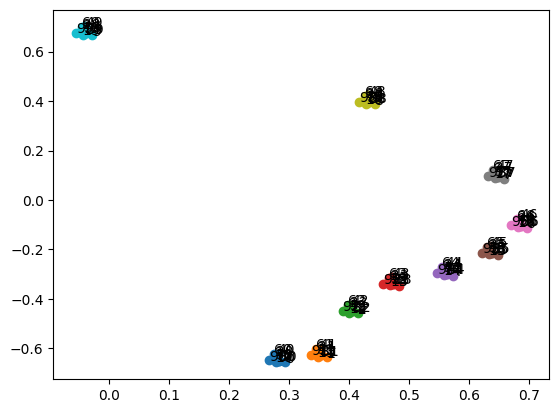

3/3 [==============================] - 0s 14ms/step - loss: 6.6212e-04 - mse: 6.6212e-04 - val_loss: 5.5542e-04 - val_mse: 5.5542e-04
epoch  250
3/3 [==============================] - 0s 13ms/step - loss: 6.2005e-04 - mse: 6.2005e-04 - val_loss: 5.7296e-04 - val_mse: 5.7296e-04
epoch  251
3/3 [==============================] - 0s 14ms/step - loss: 5.9643e-04 - mse: 5.9643e-04 - val_loss: 5.8869e-04 - val_mse: 5.8869e-04
epoch  252
3/3 [==============================] - 0s 14ms/step - loss: 5.5843e-04 - mse: 5.5843e-04 - val_loss: 5.4623e-04 - val_mse: 5.4623e-04
epoch  253
3/3 [==============================] - 0s 14ms/step - loss: 5.2220e-04 - mse: 5.2220e-04 - val_loss: 5.4041e-04 - val_mse: 5.4041e-04
epoch  254
3/3 [==============================] - 0s 14ms/step - loss: 4.9545e-04 - mse: 4.9545e-04 - val_loss: 5.3493e-04 - val_mse: 5.3493e-04
epoch  255
3/3 [==============================] - 0s 14ms/step - loss: 4.7733e-04 - mse: 4.7733e-04 - val_loss: 5.3068e-04 - val_mse: 5.3068e

epoch  282
3/3 [==============================] - 0s 13ms/step - loss: 4.3346e-04 - mse: 4.3346e-04 - val_loss: 4.1330e-04 - val_mse: 4.1330e-04
epoch  283
3/3 [==============================] - 0s 13ms/step - loss: 4.3397e-04 - mse: 4.3397e-04 - val_loss: 3.7465e-04 - val_mse: 3.7465e-04
epoch  284
3/3 [==============================] - 0s 14ms/step - loss: 4.3656e-04 - mse: 4.3656e-04 - val_loss: 3.4843e-04 - val_mse: 3.4843e-04
epoch  285
3/3 [==============================] - 0s 13ms/step - loss: 4.3880e-04 - mse: 4.3880e-04 - val_loss: 3.2373e-04 - val_mse: 3.2373e-04
epoch  286
3/3 [==============================] - 0s 14ms/step - loss: 4.5089e-04 - mse: 4.5089e-04 - val_loss: 3.1157e-04 - val_mse: 3.1157e-04
epoch  287
3/3 [==============================] - 0s 13ms/step - loss: 4.4531e-04 - mse: 4.4531e-04 - val_loss: 3.0755e-04 - val_mse: 3.0755e-04
epoch  288
3/3 [==============================] - 0s 13ms/step - loss: 4.4968e-04 - mse: 4.4968e-04 - val_loss: 2.9768e-04 - val_m

1/1 [==============================] - 0s 13ms/step


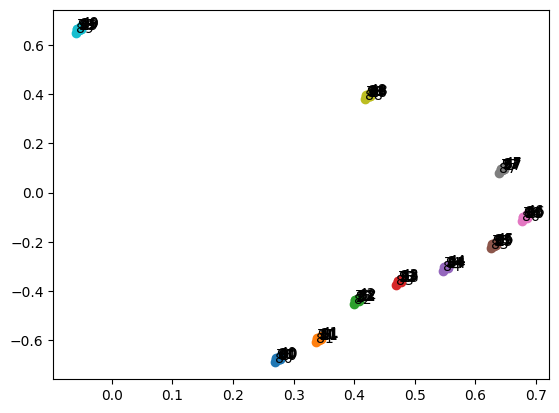

3/3 [==============================] - 0s 13ms/step - loss: 2.1573e-04 - mse: 2.1573e-04 - val_loss: 2.2397e-04 - val_mse: 2.2397e-04
epoch  300
3/3 [==============================] - 0s 13ms/step - loss: 1.9994e-04 - mse: 1.9994e-04 - val_loss: 2.0324e-04 - val_mse: 2.0324e-04
epoch  301
3/3 [==============================] - 0s 14ms/step - loss: 1.7909e-04 - mse: 1.7909e-04 - val_loss: 1.9278e-04 - val_mse: 1.9278e-04
epoch  302
3/3 [==============================] - 0s 13ms/step - loss: 1.7915e-04 - mse: 1.7915e-04 - val_loss: 1.8888e-04 - val_mse: 1.8888e-04
epoch  303
3/3 [==============================] - 0s 13ms/step - loss: 1.7523e-04 - mse: 1.7523e-04 - val_loss: 1.8238e-04 - val_mse: 1.8238e-04
epoch  304
3/3 [==============================] - 0s 14ms/step - loss: 1.7597e-04 - mse: 1.7597e-04 - val_loss: 1.7584e-04 - val_mse: 1.7584e-04
epoch  305
3/3 [==============================] - 0s 15ms/step - loss: 1.7492e-04 - mse: 1.7492e-04 - val_loss: 1.7292e-04 - val_mse: 1.7292e

epoch  332
3/3 [==============================] - 0s 16ms/step - loss: 1.9762e-04 - mse: 1.9762e-04 - val_loss: 1.7846e-04 - val_mse: 1.7846e-04
epoch  333
3/3 [==============================] - 0s 13ms/step - loss: 2.0204e-04 - mse: 2.0204e-04 - val_loss: 1.7145e-04 - val_mse: 1.7145e-04
epoch  334
3/3 [==============================] - 0s 15ms/step - loss: 2.1274e-04 - mse: 2.1274e-04 - val_loss: 1.6788e-04 - val_mse: 1.6788e-04
epoch  335
3/3 [==============================] - 0s 14ms/step - loss: 2.1717e-04 - mse: 2.1717e-04 - val_loss: 1.6702e-04 - val_mse: 1.6702e-04
epoch  336
3/3 [==============================] - 0s 14ms/step - loss: 2.2333e-04 - mse: 2.2333e-04 - val_loss: 1.6505e-04 - val_mse: 1.6505e-04
epoch  337
3/3 [==============================] - 0s 14ms/step - loss: 2.2496e-04 - mse: 2.2496e-04 - val_loss: 1.6741e-04 - val_mse: 1.6741e-04
epoch  338
3/3 [==============================] - 0s 15ms/step - loss: 2.2980e-04 - mse: 2.2980e-04 - val_loss: 1.7129e-04 - val_m

1/1 [==============================] - 0s 14ms/step


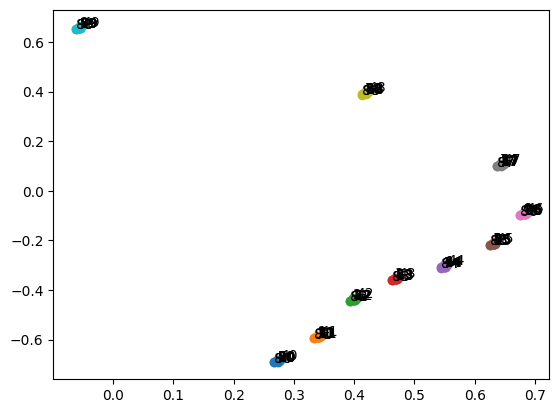

3/3 [==============================] - 0s 14ms/step - loss: 1.6749e-04 - mse: 1.6749e-04 - val_loss: 1.7659e-04 - val_mse: 1.7659e-04
epoch  350
3/3 [==============================] - 0s 13ms/step - loss: 1.5603e-04 - mse: 1.5603e-04 - val_loss: 1.7214e-04 - val_mse: 1.7214e-04
epoch  351
3/3 [==============================] - 0s 14ms/step - loss: 1.5297e-04 - mse: 1.5297e-04 - val_loss: 1.6612e-04 - val_mse: 1.6612e-04
epoch  352
3/3 [==============================] - 0s 13ms/step - loss: 1.5091e-04 - mse: 1.5091e-04 - val_loss: 1.5680e-04 - val_mse: 1.5680e-04
epoch  353
3/3 [==============================] - 0s 13ms/step - loss: 1.4648e-04 - mse: 1.4648e-04 - val_loss: 1.5143e-04 - val_mse: 1.5143e-04
epoch  354
3/3 [==============================] - 0s 14ms/step - loss: 1.4635e-04 - mse: 1.4635e-04 - val_loss: 1.4672e-04 - val_mse: 1.4672e-04
epoch  355
3/3 [==============================] - 0s 14ms/step - loss: 1.5164e-04 - mse: 1.5164e-04 - val_loss: 1.4341e-04 - val_mse: 1.4341e

epoch  382
3/3 [==============================] - 0s 13ms/step - loss: 2.2745e-04 - mse: 2.2745e-04 - val_loss: 1.9253e-04 - val_mse: 1.9253e-04
epoch  383
3/3 [==============================] - 0s 13ms/step - loss: 2.4372e-04 - mse: 2.4372e-04 - val_loss: 1.8855e-04 - val_mse: 1.8855e-04
epoch  384
3/3 [==============================] - 0s 14ms/step - loss: 2.4996e-04 - mse: 2.4996e-04 - val_loss: 1.9235e-04 - val_mse: 1.9235e-04
epoch  385
3/3 [==============================] - 0s 14ms/step - loss: 2.6388e-04 - mse: 2.6388e-04 - val_loss: 1.8928e-04 - val_mse: 1.8928e-04
epoch  386
3/3 [==============================] - 0s 14ms/step - loss: 2.6728e-04 - mse: 2.6728e-04 - val_loss: 1.9018e-04 - val_mse: 1.9018e-04
epoch  387
3/3 [==============================] - 0s 15ms/step - loss: 2.7070e-04 - mse: 2.7070e-04 - val_loss: 1.9094e-04 - val_mse: 1.9094e-04
epoch  388
3/3 [==============================] - 0s 14ms/step - loss: 2.6437e-04 - mse: 2.6437e-04 - val_loss: 2.0352e-04 - val_m

1/1 [==============================] - 0s 14ms/step


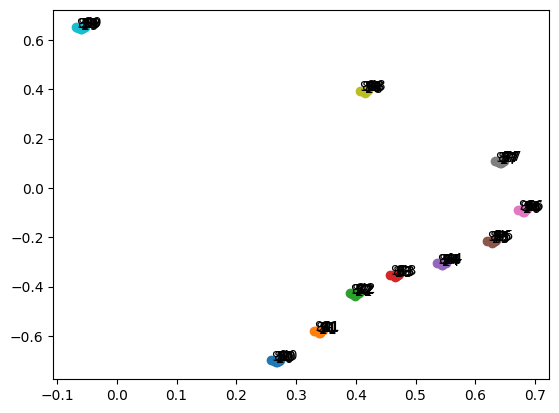

3/3 [==============================] - 0s 14ms/step - loss: 1.6289e-04 - mse: 1.6289e-04 - val_loss: 1.7870e-04 - val_mse: 1.7870e-04
epoch  400
3/3 [==============================] - 0s 14ms/step - loss: 1.5702e-04 - mse: 1.5702e-04 - val_loss: 1.6812e-04 - val_mse: 1.6812e-04
epoch  401
3/3 [==============================] - 0s 14ms/step - loss: 1.5339e-04 - mse: 1.5339e-04 - val_loss: 1.5951e-04 - val_mse: 1.5951e-04
epoch  402
3/3 [==============================] - 0s 15ms/step - loss: 1.5598e-04 - mse: 1.5598e-04 - val_loss: 1.5243e-04 - val_mse: 1.5243e-04
epoch  403
3/3 [==============================] - 0s 14ms/step - loss: 1.6032e-04 - mse: 1.6032e-04 - val_loss: 1.4859e-04 - val_mse: 1.4859e-04
epoch  404
3/3 [==============================] - 0s 14ms/step - loss: 1.6480e-04 - mse: 1.6480e-04 - val_loss: 1.5364e-04 - val_mse: 1.5364e-04
epoch  405
3/3 [==============================] - 0s 14ms/step - loss: 1.7707e-04 - mse: 1.7707e-04 - val_loss: 1.4799e-04 - val_mse: 1.4799e

epoch  432
3/3 [==============================] - 0s 14ms/step - loss: 3.4972e-04 - mse: 3.4972e-04 - val_loss: 2.5684e-04 - val_mse: 2.5684e-04
epoch  433
3/3 [==============================] - 0s 13ms/step - loss: 3.5174e-04 - mse: 3.5174e-04 - val_loss: 2.5643e-04 - val_mse: 2.5643e-04
epoch  434
3/3 [==============================] - 0s 13ms/step - loss: 3.6247e-04 - mse: 3.6247e-04 - val_loss: 2.5018e-04 - val_mse: 2.5018e-04
epoch  435
3/3 [==============================] - 0s 14ms/step - loss: 3.5922e-04 - mse: 3.5922e-04 - val_loss: 2.7588e-04 - val_mse: 2.7588e-04
epoch  436
3/3 [==============================] - 0s 14ms/step - loss: 3.7652e-04 - mse: 3.7652e-04 - val_loss: 2.7823e-04 - val_mse: 2.7823e-04
epoch  437
3/3 [==============================] - 0s 14ms/step - loss: 3.7511e-04 - mse: 3.7511e-04 - val_loss: 2.8209e-04 - val_mse: 2.8209e-04
epoch  438
3/3 [==============================] - 0s 14ms/step - loss: 3.5989e-04 - mse: 3.5989e-04 - val_loss: 2.7637e-04 - val_m

1/1 [==============================] - 0s 14ms/step


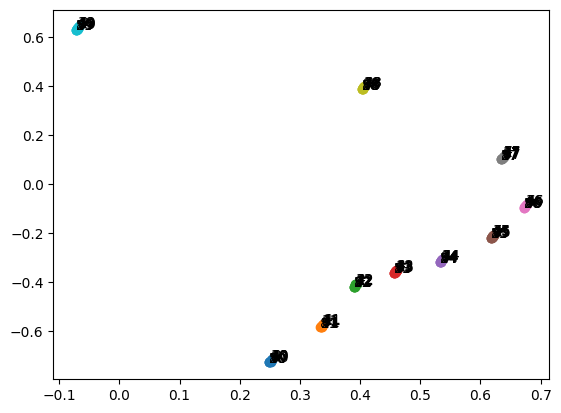

3/3 [==============================] - 0s 13ms/step - loss: 2.2411e-04 - mse: 2.2411e-04 - val_loss: 2.4156e-04 - val_mse: 2.4156e-04
epoch  450
3/3 [==============================] - 0s 13ms/step - loss: 2.3109e-04 - mse: 2.3109e-04 - val_loss: 2.3561e-04 - val_mse: 2.3561e-04
epoch  451
3/3 [==============================] - 0s 14ms/step - loss: 2.3490e-04 - mse: 2.3490e-04 - val_loss: 2.3674e-04 - val_mse: 2.3674e-04
epoch  452
3/3 [==============================] - 0s 13ms/step - loss: 2.4357e-04 - mse: 2.4357e-04 - val_loss: 2.3474e-04 - val_mse: 2.3474e-04
epoch  453
3/3 [==============================] - 0s 13ms/step - loss: 2.5048e-04 - mse: 2.5048e-04 - val_loss: 2.2393e-04 - val_mse: 2.2393e-04
epoch  454
3/3 [==============================] - 0s 13ms/step - loss: 2.5709e-04 - mse: 2.5709e-04 - val_loss: 2.2540e-04 - val_mse: 2.2540e-04
epoch  455
3/3 [==============================] - 0s 13ms/step - loss: 2.7950e-04 - mse: 2.7950e-04 - val_loss: 2.2431e-04 - val_mse: 2.2431e

epoch  482
3/3 [==============================] - 0s 14ms/step - loss: 4.6527e-04 - mse: 4.6527e-04 - val_loss: 3.3133e-04 - val_mse: 3.3133e-04
epoch  483
3/3 [==============================] - 0s 15ms/step - loss: 4.7424e-04 - mse: 4.7424e-04 - val_loss: 3.3849e-04 - val_mse: 3.3849e-04
epoch  484
3/3 [==============================] - 0s 16ms/step - loss: 4.7878e-04 - mse: 4.7878e-04 - val_loss: 3.4494e-04 - val_mse: 3.4494e-04
epoch  485
3/3 [==============================] - 0s 15ms/step - loss: 4.7258e-04 - mse: 4.7258e-04 - val_loss: 3.5424e-04 - val_mse: 3.5424e-04
epoch  486
3/3 [==============================] - 0s 14ms/step - loss: 4.6677e-04 - mse: 4.6677e-04 - val_loss: 3.5495e-04 - val_mse: 3.5495e-04
epoch  487
3/3 [==============================] - 0s 14ms/step - loss: 4.4573e-04 - mse: 4.4573e-04 - val_loss: 3.6271e-04 - val_mse: 3.6271e-04
epoch  488
3/3 [==============================] - 0s 13ms/step - loss: 4.3017e-04 - mse: 4.3017e-04 - val_loss: 3.6965e-04 - val_m

In [101]:
for epoch in range(500):
    if epoch%50 == 0:
        import random
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        for i in range(100):
            pred = word_model.predict([int_to_vec(i)])
            ax.scatter(pred[:,0], pred[:,1])
            ax.annotate(i, pred[0])
        plt.show()
    model.fit(X_train, word_model.predict(y_train), epochs=1, validation_data=(X_test, word_model.predict(y_test)))
    print("epoch ", epoch)

In [102]:
model.predict([0, 1, 6])

1/1 [==============================] - 0s 47ms/step


array([[0.6310698, 0.1039045]], dtype=float32)

In [103]:
model.predict([0, 1, 7])

1/1 [==============================] - 0s 14ms/step


array([[0.39253986, 0.38222015]], dtype=float32)

In [104]:
word_model.predict([0, 1, 7])

1/1 [==============================] - 0s 13ms/step


array([[0.63022715, 0.11265953]], dtype=float32)

In [105]:
word_model.predict([0, 1, 8])

1/1 [==============================] - 0s 13ms/step


array([[0.39686963, 0.38982448]], dtype=float32)

In [106]:
word_model.predict([[4, 5, 5], [3, 4, 2], [3, 4, 3]])

1/1 [==============================] - 0s 14ms/step


array([[ 0.56252265, -0.26165575],
       [ 0.3372431 , -0.4294938 ],
       [ 0.4046578 , -0.38526946]], dtype=float32)

1/1 [==============================] - 0s 14ms/step


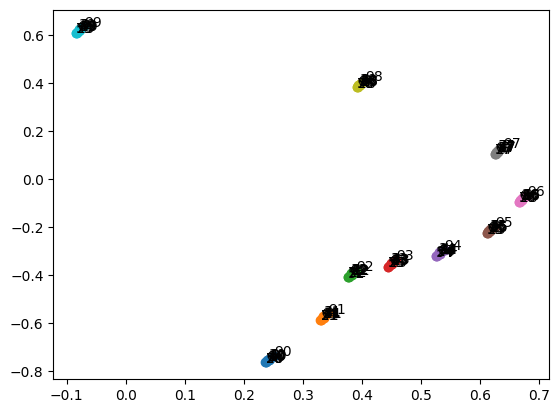

In [107]:
import random

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(100):
    pred = word_model.predict([int_to_vec(i)])
    ax.scatter(pred[:,0], pred[:,1])
    ax.annotate(i, pred[0])

In [108]:
for i in range(100):
    pred = word_model.predict([int_to_vec(i)])
    print(i, pred)

1/1 [==============================] - 0s 13ms/step
0 [[ 0.24390703 -0.7484086 ]]
1/1 [==============================] - 0s 14ms/step
1 [[ 0.33689624 -0.5706761 ]]
1/1 [==============================] - 0s 14ms/step
2 [[ 0.38355288 -0.39308712]]
1/1 [==============================] - 0s 13ms/step
3 [[ 0.4509676  -0.34886274]]
1/1 [==============================] - 0s 13ms/step
4 [[ 0.5330746  -0.30612534]]
1/1 [==============================] - 0s 13ms/step
5 [[ 0.6182759  -0.21048862]]
1/1 [==============================] - 0s 13ms/step
6 [[ 0.6722935  -0.08052707]]
1/1 [==============================] - 0s 14ms/step
7 [[0.6316396  0.12027279]]
1/1 [==============================] - 0s 15ms/step
8 [[0.39828208 0.39743772]]
1/1 [==============================] - 0s 14ms/step
9 [[-0.0769062  0.624644 ]]
1/1 [==============================] - 0s 14ms/step
10 [[ 0.24249458 -0.7560219 ]]
1/1 [==============================] - 0s 15ms/step
11 [[ 0.3354838  -0.57828933]]
1/1 [===============

1/1 [==============================] - 0s 14ms/step
99 [[-0.07032749  0.6348088 ]]


In [109]:
model.predict(np.array([[[9, 0, 0]]]))

1/1 [==============================] - 0s 7ms/step


array([[ 0.23561636, -0.73376554]], dtype=float32)

In [110]:
word_model.predict(np.array([[[9, 0, 1]]]))

1/1 [==============================] - 0s 7ms/step


array([[ 0.17861313, -0.6906272 ]], dtype=float32)